## Minicurso - ML (P1)

## Mateus Pedrino -  Igor Braga - Igor Martinelli

Este primeiro módulo se dedica a implementação e avaliação de um Perceptron utilizando os dados do repositório sonar do UCI Machine Learning (link abaixo). O dataset constitui características de reflexão de objetos utilizando sonar e a variável dependente descreve se objeto é uma pedra (R) ou um minério (M). Vamos tentar prever essa relação.

Link dataset : https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/sonar.all-data.csv', sep = ',', header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
# Colunas sem nomes -> vamos deixar x para input e y para output
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

In [6]:
# Renomeia com list comprehension
df.columns = ['x' + str(i+1) if i != (df.shape[1]-1)  else 'y' for i in df.columns]

In [7]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20', 'x21',
       'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30', 'x31',
       'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40', 'x41',
       'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50', 'x51',
       'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60', 'y'],
      dtype='object')

In [8]:
# Bias 
df['x0'] = 1
# Passa x0 para a primeira coluna
cols = list(df.columns)
df = df[[cols[-1]] + cols[:-1]]

In [9]:
df.columns

Index(['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10',
       'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19', 'x20',
       'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29', 'x30',
       'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39', 'x40',
       'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49', 'x50',
       'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y'],
      dtype='object')

In [10]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x52,x53,x54,x55,x56,x57,x58,x59,x60,y
0,1,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,1,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,1,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [11]:
# Problema de classificacao -> São duas classes
df.y.unique()

array(['R', 'M'], dtype=object)

In [12]:
# Distribuição das classes
df.y.value_counts()

M    111
R     97
Name: y, dtype: int64

Está bem distribuído ! 

In [13]:
# Substituindo classes por números
for count, i in enumerate(df.y.unique()):
    df.y.replace(i, count, inplace = True)

In [14]:
df.y.unique()

array([0, 1])

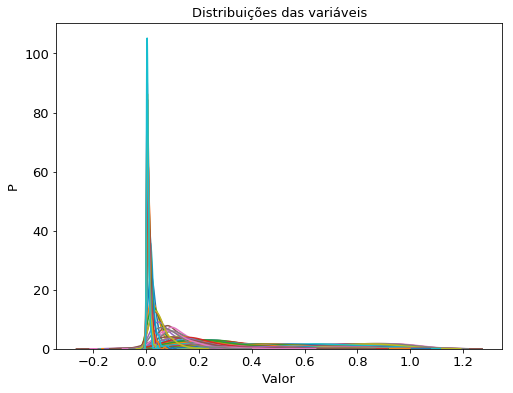

In [15]:
plt.figure(figsize = (8,6))
plt.title('Distribuições das variáveis', fontsize = 13)
for i in df.columns[1:-1]:
    sns.distplot(df[i], hist = False)#, label = i)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.ylabel('P', fontsize = 13)
plt.xlabel('Valor', fontsize = 13)
#plt.legend(False, fontsize = 13)
plt.show()

Maioria esmagadora dos valores estão em torno de 0 e, em módulo, não ultrapassam 1.3. Não vamos aplicar normalização pois o foco agora será o Perceptron. Mas não esqueçam da normalização e da padronização !

In [77]:
# Divisao em conjunto de treinamento e teste
from sklearn.model_selection import train_test_split

In [78]:
# Matriz de entradas
X = np.array(df[df.columns[:-1]])
# Matriz de saída
Y = np.array(df[df.columns[-1]])
# Divisão em treinamento e teste (70 % treinamento e 30% teste)
p = 0.7 # porc. para treinamento
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 1-p)

In [79]:
# Lembrando o shape original e o que se espera
print('Dimensão original : ', df.shape, '\n')
print('Qte linhas esperadas : ')
print(str(df.shape[0])+'x0.7='+ str(0.7*df.shape[0]))
print(str(df.shape[0])+'x0.3='+ str(0.3*df.shape[0]))

Dimensão original :  (208, 62) 

Qte linhas esperadas : 
208x0.7=145.6
208x0.3=62.4


In [80]:
print('Dimensão matriz de entrada de treinamento : ',train_x.shape)
print('Dimensão matriz de entrada de teste : ',test_x.shape)
print('Dimensão matriz de saída de treinamento : ',train_y.shape)
print('Dimensão matriz de saída de teste : ',test_y.shape)

Dimensão matriz de entrada de treinamento :  (145, 61)
Dimensão matriz de entrada de teste :  (63, 61)
Dimensão matriz de saída de treinamento :  (145,)
Dimensão matriz de saída de teste :  (63,)


In [81]:
train_x[:4,:4] # Primeiras 4 linhas e 4 colunas

array([[1.    , 0.0091, 0.0213, 0.0206],
       [1.    , 0.0258, 0.0433, 0.0547],
       [1.    , 0.0231, 0.0315, 0.017 ],
       [1.    , 0.0235, 0.0291, 0.0749]])

In [96]:
# Treino do Perceptron
def train_perceptron(train_x, train_y, n, num_epocas):
    epoca = 0
    scr = []
    W = np.random.uniform(low = 0, high = 1, size = (train_x.shape[1], 1))
    while epoca < num_epocas:
        buff = 0
        epoca += 1
        for count, i in enumerate(train_x):
            u = np.matmul(i, W)[0]
            # Funcao de ativacao (degrau)
            if u >= 0:
                y = 1
            else:
                y = 0
            # Saída da f. de ativação difere da saída esperada -> atualiza pesos
            if y != train_y[count]:
                W = W + n * (train_y[count] - y) * i.reshape(-1,1)
            # Saída da f. de ativação igual à saída esperada -> mantém pesos
            else: 
                buff += 1 # número de acertos na base
        # A cada epoca registra a acuracia de treinamento
        scr.append(buff / train_x.shape[0])
    # Retorna somente a acuracia de treinamento da ultima epoca
    return W, scr[-1]

In [97]:
W, acc = train_perceptron(train_x, train_y, 0.1, 15) 

In [98]:
print('Acuracia treino : %.2f'%acc)

Acuracia treino : 0.74


In [99]:
# Predição com matriz de pesos do Perceptron treinada
def predict(test_x, W):
    y_pred = [] # vetor de preditos
    for count, i in enumerate(test_x):
        u = np.matmul(i, W)[0]
        # Funcao de ativacao (degrau)
        if u >= 0:  
            y = 1
        else: 
            y = 0
        y_pred.append(y)
    return  np.array(y_pred)

In [100]:
y_pred = predict(test_x, W)

In [101]:
# Calcula acurácia pelo sklearn
from sklearn.metrics import accuracy_score

In [102]:
print('Acuracia teste : %.2f'%accuracy_score(y_pred, test_y))

Acuracia teste : 0.73
